## Name: Halak Desai
## Shopify Data Science Internship Challenge- Winter 2021

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation.   
2. Think about a better way to evaluate this data.   
3. What metric would you report for this dataset?  
4. What is its value?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [106]:
data['order_amount'].mean()

3145.128

In [221]:
data['order_amount'].median()

284.0

Median is a better measure than mean when data is skewed due to some outliers.

I am going to check basic information for the data. 

In [4]:
data.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

I am going to change some data types, to make my analysis easier and efficient:
1. Change created_at with date_time.
2. Order_id, shop_id and user_id to string from numerical.

In [5]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [6]:
data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [7]:
data['created_at_date'] = pd.to_datetime(data['created_at']).dt.date

Checking if there is any null values

In [8]:
data.isnull().mean()

order_id           0.0
shop_id            0.0
user_id            0.0
order_amount       0.0
total_items        0.0
payment_method     0.0
created_at         0.0
created_at_date    0.0
dtype: float64

In [9]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 04:23:56,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,2017-03-01
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,2017-03-19
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16


In [10]:
data.dtypes

order_id                    int64
shop_id                     int64
user_id                     int64
order_amount                int64
total_items                 int64
payment_method             object
created_at         datetime64[ns]
created_at_date            object
dtype: object

In [11]:
data['order_id'] = data['order_id'].astype('str')
data['shop_id'] = data['shop_id'].astype('str')
data['user_id'] = data['user_id'].astype('str')

Checking for the basic description and looking for any unusual activity.

In [12]:
data.describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


I can right away see that there is very high order amount and total items in the 4th quartile i.e. between 75% to max range.
So I can see why the rolling average would be not be right for order amount, because average would be skewed due to this high numbers.

In [107]:
# Let us check for the extreme values.

extremes = data[(data['order_amount'] > 1000) & (data['total_items'] > 3)]

In [15]:
extremes

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_date
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,2017-03-07
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,2017-03-04
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,2017-03-02
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,2017-03-27
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,2017-03-24
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,2017-03-15
1364,1365,42,797,1760,5,cash,2017-03-10 06:28:21,2017-03-10
1367,1368,42,926,1408,4,cash,2017-03-13 02:38:34,2017-03-13
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,2017-03-11
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22,2017-03-12


So here I can see that the total order amount would skew a rolling 30 day average as some store have an exceptionally high order value due to more number of items purchased by that user on that day.  
Hence, a better measure would be to calculate amount per total items purchased for an order which I am going to call as average price for that order.

In [62]:
data['average_price'] = data['order_amount']/data['total_items']

Now I want to check how my data looks with added feature average price

In [108]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_date,average_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:56,2017-03-14,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,2017-03-01,156.0
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,2017-03-19,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16,177.0


In [111]:
data.describe()

,order_amount,total_items,average_price
count,5000.000000,5000.00000,5000.000000
mean,3145.128000,8.78720,387.742800
std,41282.539349,116.32032,2441.963725
min,90.000000,1.00000,90.000000
25%,163.000000,1.00000,133.000000
50%,284.000000,2.00000,153.000000
75%,390.000000,3.00000,169.000000
max,704000.000000,2000.00000,25725.000000


I can see that my mean or average for 30 days sounds more right as we fixed the skeweness in the data to an extent. Hence, This looks to be more appropriate measure for calculating performance of the stores.  
I can still see that max is 25725.  
So, I am going to investigate more.

In [112]:
# Checking for the max average price, by sorting my data in descending order

outlier1 = data.sort_values(by = 'average_price', ascending = False).head(50)  
outlier1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_at_date,average_price
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,2017-03-09,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 03:45:46,2017-03-16,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01,2017-03-22,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,2017-03-16,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,2017-03-27,25725.0
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54,2017-03-17,25725.0
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08,2017-03-12,25725.0
3403,3404,78,928,77175,3,debit,2017-03-16 09:45:05,2017-03-16,25725.0
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46,2017-03-15,25725.0
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43,2017-03-26,25725.0


So it seems that the value 25725 is being registered at store number 78 only. I can also see that there is only 1 or 2 items at the most 6 items purchased at the store.
There could be multiple reasons for this value:
1. Error in entering the order amount
2. Error in entering the total items

So, for my further analysis I am going to drop this store.
More investigation is needed for the store # 78 and why there is an error in the numbers

In [70]:
data1 = data.drop(data[(data.shop_id == '78')].index)
# some error with either the intial data at this store of how the amount is entered

## Top 10 stores with highest average price per order

In [113]:
data1.groupby(['shop_id']).max()['average_price'].sort_values(ascending = False).head(10)

shop_id
42    352.0
12    201.0
89    196.0
99    195.0
50    193.0
38    190.0
6     187.0
51    187.0
11    184.0
43    181.0
Name: average_price, dtype: float64

Looks like store number 42 is our top shop doing great business.  
As we know that all stores sell only one model of shoe, the shoe that #42 store sells is a higher priced item.

### Now let us see the total order amount for stores

In [114]:
top_5 = data1.groupby(['shop_id']).mean()[['average_price','order_amount','total_items']].sort_values(by = 'average_price',ascending = False).head(5)

In [120]:
top_5.reset_index(drop = False, inplace = True)

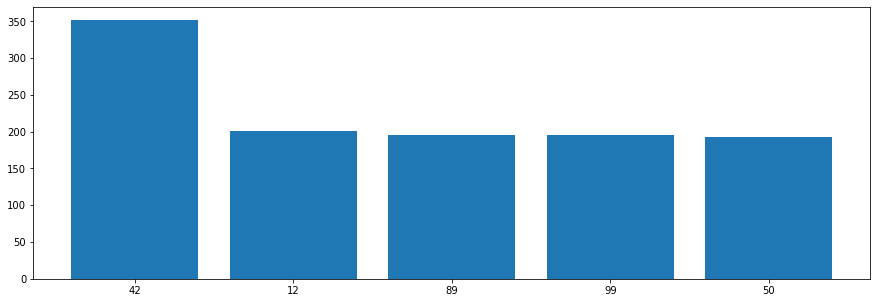

In [124]:
plt.figure(figsize = (15,5))
plt.bar(height = top_5['average_price'], x = top_5['shop_id'] )
plt.show()

So clearly number 42 store is our best performing store

### Let us check bottom 5 performing stores

In [129]:
bottom_5 = data1.groupby(['shop_id']).mean()[['average_price','order_amount','total_items']].sort_values(by = 'average_price',ascending = True).head(5)

In [130]:
bottom_5 

,average_price,order_amount,total_items
shop_id,,,
92,90.0,162.857143,1.809524
2,94.0,174.327273,1.854545
32,101.0,189.976190,1.880952
100,111.0,213.675000,1.925000
53,112.0,214.117647,1.911765


In [131]:
bottom_5.reset_index(drop = False, inplace = True)

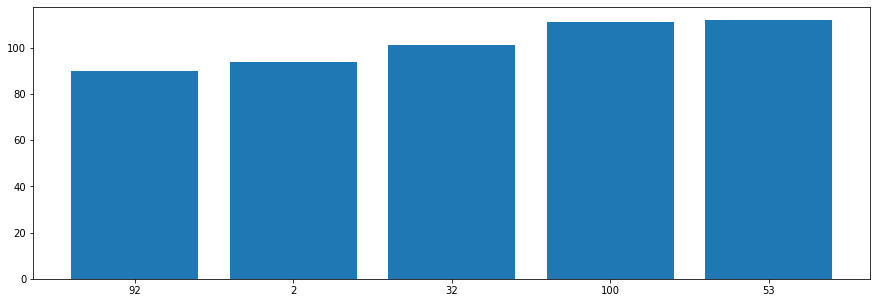

In [132]:
plt.figure(figsize = (15,5))
plt.bar(height = bottom_5['average_price'], x = bottom_5['shop_id'] )
plt.show()

So here we can see that store number 92 is clearly struggling

I also wanted to see what is the pattern of payement.   
I can see here that credit card payment is most popular followed by debit cards and cash respectively.

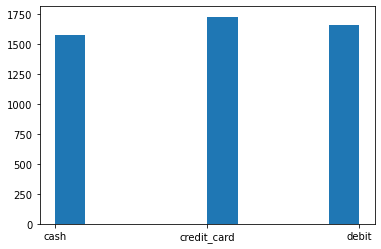

In [83]:
plt.figure()
plt.hist(data1['payment_method'])
plt.show()

### Top 10 stores with highest Foot Traffic (Number of times Users buying sneakers at this store)

In [219]:
data1.groupby(['shop_id']).count()['user_id'].sort_values(ascending = False).head(10)

shop_id
53    68
71    66
19    64
13    63
89    61
59    60
69    60
81    59
93    59
41    59
Name: user_id, dtype: int64

These are top 10 shops where there is maximum number of users, which could be useful metric to check which stores have more customers purchasing sneakers, and more analysis can be done. 

### Bottom 10 stores with least foot traffic (Number of users buying from the store)

In [220]:
data1.groupby(['shop_id']).count()['user_id'].sort_values(ascending = True).head(10)

shop_id
38     35
85     35
67     37
56     37
74     38
44     39
95     39
33     40
100    40
48     40
Name: user_id, dtype: int64

These are bottom 10 shops where there is minimum number of users, which could be useful metric to check which stores have least customers purchasing sneakers, and more analysis can be done. 

I wanted to know if there is any relationship between number of users shopping at store and the $$ sales of the store.

In [217]:
# going to do some counts and sum by usig group by and agg functions

count = data1.groupby(['shop_id']).agg({'user_id': 'count', 'average_price': 'sum'}).sort_values(by = 'average_price',ascending = False).head(10)
count.reset_index(drop = False, inplace = True)
count

,shop_id,user_id,average_price
0,42,51,17952.0
1,89,61,11956.0
2,6,59,11033.0
3,71,66,10824.0
4,59,60,10680.0
5,12,53,10653.0
6,99,54,10530.0
7,43,58,10498.0
8,81,59,10443.0
9,19,64,10432.0


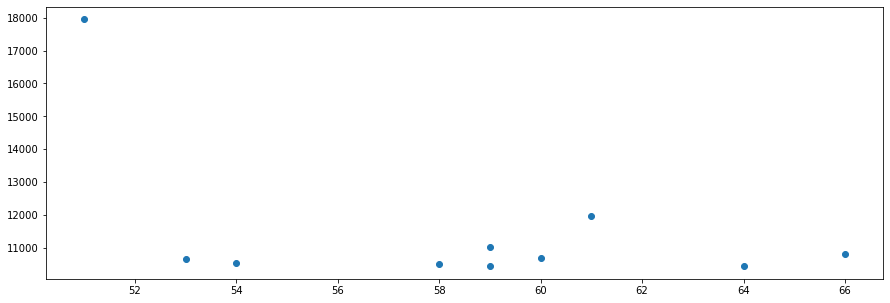

In [218]:
plt.figure(figsize = (15,5))
plt.scatter(x = count['user_id'], y = count['average_price'])
plt.show()

So I dont see any pattern between number of users shopping and sales of the shop.  
Hence number of users and sales dont have any relation.  
But I saw that store number 42 has the foot traffic of 51 users in a month with sum of average price per order being maximum.
Hence, we can further analyse store number 42 in detail. We can learn from this store, and insights found could be applied to other stores to increase their sales.

### I also wanted to see if I can identify any users for exceptional purchase history.

In [222]:
# using groupby and aggregate functions

ut = data1.groupby(['user_id']).agg({'average_price': 'mean', 'order_amount': 'mean', 'total_items': 'mean', 'user_id':'count'}).sort_values([('average_price')], ascending=False).head(5)

In [208]:
ut['user_id_count']= ut['user_id']
ut.drop(['user_id'], axis = 1, inplace = True)

In [209]:
ut.reset_index(drop = False, inplace = True)
ut

,user_id,average_price,order_amount,total_items,user_id_count
0,607,352.000000,704000.000000,2000.000000,17
1,819,179.187500,323.625000,1.750000,16
2,739,179.111111,383.555556,2.277778,18
3,720,178.800000,356.666667,2.000000,15
4,904,177.750000,362.833333,2.083333,12


I see that user 607 who shops at store number 42 buys maximum number of items and may be on the higher side of the price range
for sneakers. Hence, we can do further analysis of these top users and build a profile to target any promotions or offers.

# Summary and Conclusion


**1. Think about what could be going wrong with our calculation.**

As mentioned earlier in the analysis, Some stores might have large sales due to exceptionally higher number of items bought.  
This would skew our mean and not represent true story of all stores.

**2. Think about a better way to evaluate this data.**

 Median or calculating average price per order is a better measure, as we already know that the sneakers are all of affordabale price.  
 
There is also an error in data entered for store 78 and data could be impute after further analysis of the error.  
For my analysis I have not considered information from store 78 and I have decided to use average price per order as seen above.

**3. What metric would you report for this dataset? 4. What is its value?**

As per analysis earlier, finding top 5 performing stores and bottom 5 performing stores is a good metric to see good stores and problem stores. This will be helpful to learn and increase more sales in top performing stores. This will also help us investigate reasons and find solution for the stores not performing well.

We can also keep an eye on the spending methods of users. This would be helpful for target marketing and offers. eg: having partnerships with credit card company and offering promotions to encourage to buy more.

Trying to see how much money users have spend and their purchase information and getting their transaction history, we can create a profile for that user, and offer them personalized recommendations and offers to increase sales.
By targeting high spenders and low spenders and understanding their purchase patterns, will help us understand market segment and personas. This in turn can help us in product offerings.

As we know that each store sells exactly 1 model of shoe, this metric will be helpful to learn which shoe is popular than others and help understand sneaker market better. This understanding in turn will help the stores to carry more products or change their offerings to gain more business.